# Data Circle Notebook 3

This notebook will introduce how we make **visualizations and graphs** using Pandas

Don't forget about importing the pandas library and importing your dataset:

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("PittsTrees.csv")

## Starting with only using 2 variables
When creating graphs there are so so so many different graphs you can create with different information. We will start simply by using only 2 variables to create a line graph. I recommend having one of your variables be **time** so you have a graph of something occurring over time.

I will show an example below using my social media sentiment dataset, you should follow along with your own dataset to create your own graph!

In [ ]:
df

## Step 1: decide what columns you would like to use!

In [ ]:
df.columns

## Step 2: Make a mini dataframe
Once you have decided make a smaller dataframe with all of the columns you will use! 

I decided to use the 4 columns below in order to compare the growth space of a tree vs. its dollar amount of air quality benefits. Don't forget to assign your new data frame to a variable name!

In [ ]:
quality_trees = df[['neighborhood', 'growth_space_width', 'air_quality_benfits_total_dollar_value']]
quality_trees

## Step 3: if you need, make more changes to your dataframe
I am deciding I just want to look at trees in Highland Park

In [ ]:
highland_trees = quality_trees[quality_trees['neighborhood'] == 'Highland Park'].drop(columns ='neighborhood')
highland_trees 

In [ ]:
highland_trees = highland_trees.groupby('growth_space_width').sum()
highland_trees

## Step 4: Graph time!!


In [ ]:
highland_trees.plot()

## Graphing with multiple variables
What if I wanted to see if other neighborhoods had a different trend for air quality vs. growth space?

In [ ]:
quality_trees

## Step 1: Find which other variables you want to compare with
I want to compare Highland Park with other neighborhoods that have a lot of trees so below I find the top 5 neighborhoods with the most trees. 

In [ ]:
quality_trees.groupby('neighborhood').count().sort_values('air_quality_benfits_total_dollar_value', ascending = False).iloc[0:5]

## Step 2: Moving things around with our friends groupby and pivot
In order to have a graph with multiple lines you need each of those categories to be their own columns. To do this you often need to use groupby and or pivot. 

**Tip:** When doing this, think of the columns as each of the different lines on the graph, the index as the x-axis, and the values in the box as the y-axis. 

Below I will be using both groupby and pivot on my data frame to have a data frame that has columns for each of the neighborhoods, an index of the growth space, and values of the dollar amount of air quality benefits. 

In [ ]:
trees_grouped = quality_trees.groupby(['growth_space_width', 'neighborhood']).sum().reset_index()
trees_grouped

In [ ]:
trees_grouped = trees_grouped.pivot(values = 'air_quality_benfits_total_dollar_value', 
                   columns = 'neighborhood', 
                    index = 'growth_space_width')
trees_grouped

## Step 3: Grab the columns with the varibles you found in step 1

In [154]:
top5trees = trees_grouped[['Highland Park','Squirrel Hill South', 'Squirrel Hill North', 'South Side Flats', 'Shadyside']]
top5trees

neighborhood,Highland Park,Squirrel Hill South,Squirrel Hill North,South Side Flats,Shadyside
growth_space_width,,,,,
0.0,18498.018730,28675.606183,2784.862106,NaN,10.877266
1.0,15.044745,65.473999,47.308968,116.597064,83.824717
2.0,1230.356052,3985.649130,1675.140259,1202.853882,940.246875
3.0,4867.267667,5054.114380,5497.782479,2011.145085,3663.326159
3.5,NaN,NaN,NaN,0.151352,NaN
4.0,745.595768,3290.711515,2180.908188,342.340811,1717.491672
4.5,3.338589,0.069626,NaN,NaN,NaN
5.0,220.934435,431.295003,1040.451469,436.804222,508.960512
6.0,NaN,1479.682983,946.565975,39.983088,68.516785


## Step 4: Graph time!!

<Axes: xlabel='growth_space_width'>

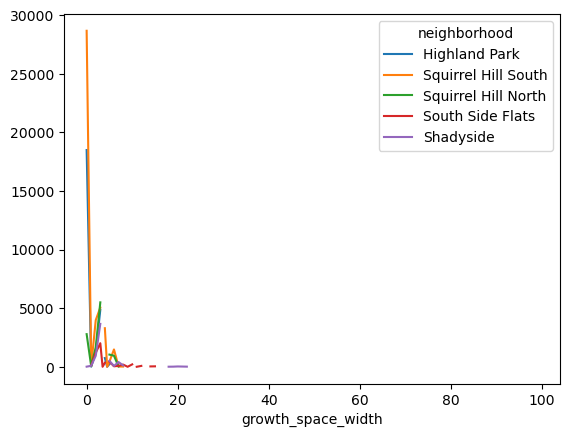

In [155]:
top5trees.plot()

Woah!! Cool graph but it is hard to tell what is happening because it is so zoomed out and there are no labels on the axies. 

## Step 5: Make it make sense
Add labels and edit the x and y axis limits to make the trends the graph is showing more clear

<Axes: title={'center': 'Tree Space Width vs Air Quality Benifits in Top 5 Tree Populated neighborhoods'}, xlabel='Tree Space Width (ft)', ylabel='Air Quality Benifits ($)'>

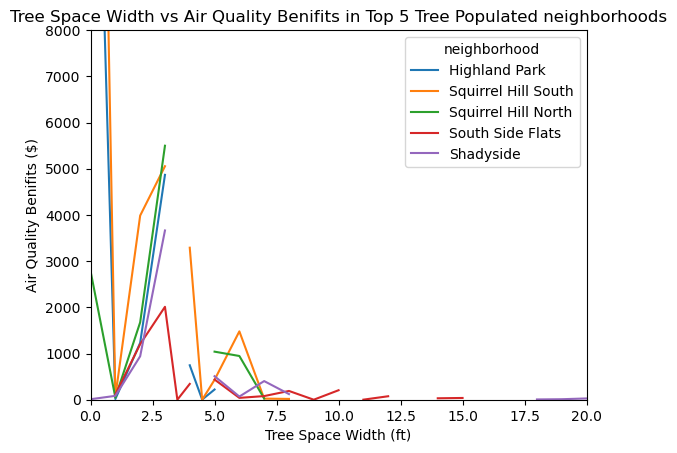

In [159]:
top5trees.plot(title = 'Tree Space Width vs Air Quality Benifits in Top 5 Tree Populated neighborhoods', 
               xlabel = 'Tree Space Width (ft)', ylabel = 'Air Quality Benifits ($)',
               xlim = [0,20], ylim = [0,8000])

From this graph, we can see that most trees take up 0 to 7.5 ft of space in width. We can also see that the most cost and space-efficient trees take up between 0.5 ft to 2.5 ft of space. 

## Now try it on your own graph!
Try this out and if you find you need to express your information in another form like a bar or scatter plot check out the plot functions on the pandas functions website we looked at last week!

If your data is still not represented well by these graphs then hold on for next week where we will check out seaborn graphs!